#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### CHAPTER 22
**CH22A How does a merger between airlines affect prices?**

 using the airline-tickets-usa dataset
 
 version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from mizani.formatters import percent_format
from plotnine import *
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/airline-tickets-usa/clean/"
data_out = dirname + "da_case_studies/ch22-airline-merger-prices/"
output = dirname + "da_case_studies/ch22-airline-merger-prices/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
from py_helper_functions import *


# I.  Examining pre-treatment trends in avg ln price

workfile to identify treated and untreated markets

In [4]:
data_work = pd.read_pickle(data_out + "ch22-airline-workfile.pkl").loc[
    lambda x: (x["balanced"] == 1) & (x["year"] == 2011)
][["origin", "finaldest", "return", "treated", "smallmkt"]]


use year-quarter panel data and merge to it treated-untreated 

(keep matched ones; no unmatched from "using")

In [5]:
data = pd.read_stata(data_in + "originfinal-panel.dta")
data = pd.merge(data, data_work, on=["origin", "finaldest", "return"])


aggreagete data to create average price by treated-untreated and year-quarter and draw time series graphs of log avg price all markets

In [6]:
weighted_avg = lambda x: np.average(x, weights=data.loc[x.index, "passengers"])


In [7]:
data_agg = (
    data.groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace("\s+", "")
).dt.to_period("Q")


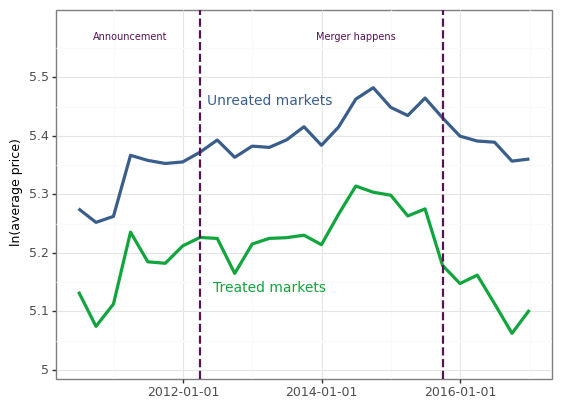

<ggplot: (873345750)>

In [8]:
(
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(date_breaks="2 year")
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(5, 5.6), breaks=np.arange(5, 5.6, 0.1)
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.14,
        label="Treated markets",
        size=10,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.46,
        label="Unreated markets",
        size=10,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2011 Q1", "date"].values[0],
        y=5.57,
        label="Announcement",
        size=7,
        color=color[2],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2014 Q2", "date"].values[0],
        y=5.57,
        label="Merger happens",
        size=7,
        color=color[2],
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)


**Small markets**

In [9]:
data_agg = (
    data.query("smallmkt == 1")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace("\s+", "")
).dt.to_period("Q")


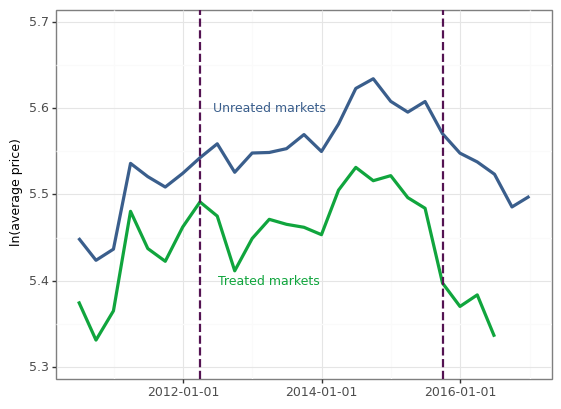

<ggplot: (869134126)>

In [10]:
(
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(date_breaks="2 year")
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(5.3, 5.7), breaks=np.arange(5.3, 5.7, 0.1)
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.4,
        label="Treated markets",
        size=9,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.6,
        label="Unreated markets",
        size=9,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)


**Large markets**

In [11]:
data_agg = (
    data.query("smallmkt == 0")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace("\s+", "")
).dt.to_period("Q")


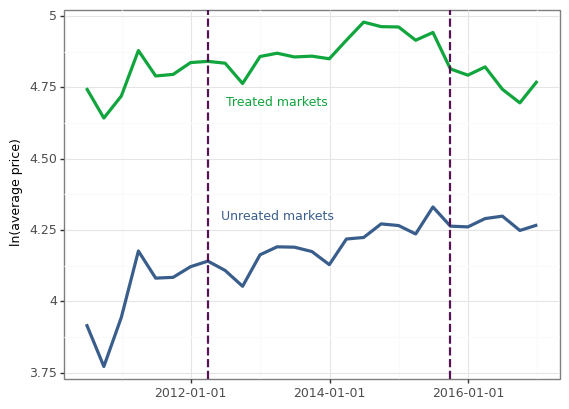

<ggplot: (681209314)>

In [12]:
(
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(date_breaks="2 year")
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(3.75, 5), breaks=np.arange(3.5, 5.25, 0.25)
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=4.7,
        label="Treated markets",
        size=9,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=4.3,
        label="Unreated markets",
        size=9,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)


# II. ANALYSIS
**Basic diff-in-diffs regression, weighted by # passengers on market, in before period**

In [13]:
# reload main file
data_agg = pd.read_pickle(data_out + "ch22-airline-workfile.pkl")
# keep balanced
data_balanced = data_agg.query("balanced == 1")


In [14]:
fd = smf.wls(
    "d_lnavgp ~ treated", data_balanced, weights=data_balanced["pass_bef"]
).fit(cov_type="HC0")
fd_small = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd_large = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [15]:
stargazer = Stargazer([fd, fd_small, fd_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


In [16]:
# Corresponding diff-in-diffs table
weighted_avg = lambda x: np.average(
    x,
    weights=data_balanced.loc[data_balanced["lnavgp"].notnull()].loc[
        x.index, "pass_bef"
    ],
)
data_balanced.loc[data_balanced["lnavgp"].notnull()].groupby(["after", "treated"]).agg(
    avgprice=("lnavgp", weighted_avg), n=("lnavgp", "count")
)


avgprice       n
after treated                  
0     False    4.926512  101275
      True     4.962715   11629
1     False    5.082928  101144
      True     4.939714   11628

**Diff-in-diffs regression with confounder variables weighted by # passengers on market, in before period**

In [17]:
data_balanced = data_balanced.merge(
    data_balanced.loc[lambda x: x["before"] == 1]
    .assign(
        lnpass=lambda x: np.log(x["passengers"]),
        sum_shares_bef=lambda x: x["shareAA"] + x["shareUS"],
    )
    .groupby("market")
    .agg(
        lnpass_bef=("lnpass", np.nanmean),
        share_bef=("sum_shares_bef", np.nanmean),
        sharelarge_bef=("sharelargest", np.nanmean),
    )
    .reset_index(),
    on="market",
)


In [18]:
data_balanced = data_balanced.rename(columns={"return": "return_"})


In [19]:
formula2 = "d_lnavgp ~ treated + lnpass_bef + return_ + stops + sharelarge_bef"

fd2 = smf.wls(formula2, data_balanced, weights=data_balanced["pass_bef"]).fit(
    cov_type="HC1"
)
fd2_small = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd2_large = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [20]:
stargazer = Stargazer([fd2, fd2_small, fd2_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


**Diff-in-diffs regerssion with quantitative treatment weighted by # passengers on market, in before period**

In [21]:
share_bef_1 = np.where(data_balanced.query("before == 1")["share_bef"] == 1, 1, 0)
share_bef_0 = np.where(data_balanced.query("before == 1")["share_bef"] == 0, 1, 0)


In [22]:
data_balanced.query("before == 1").groupby([share_bef_0, share_bef_1]).agg(
    sum=("passengers", sum), mean=("passengers", "mean"), n=("passengers", "count")
)  # bit different from R


sum        mean      n
0 0  20169344  542.376207  37187
  1     34139    9.041049   3776
1 0   3746736   51.977360  72084

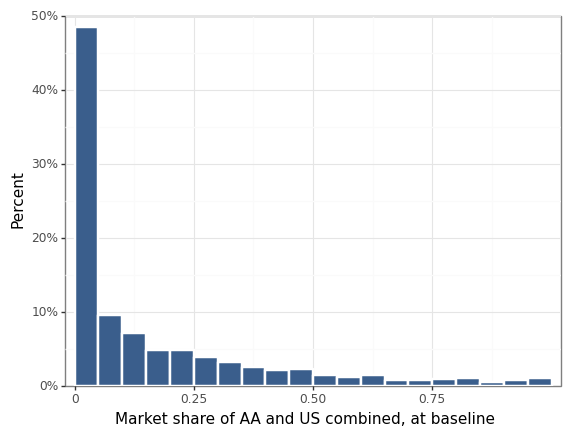

<ggplot: (680827615)>

In [23]:
(
    ggplot(
        data_balanced, aes(x="share_bef", y="stat(width*density)", weight="pass_bef")
    )
    + geom_histogram(
        binwidth=0.05,
        boundary=0,
        fill=color[0],
        alpha=0.8,
        colour="white",
        size=1,
        show_legend=False,
    )
    + labs(x="Market share of AA and US combined, at baseline", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 1), breaks=np.arange(0, 1, 0.25)
    )
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.5),
        breaks=np.arange(0, 0.51, 0.1),
        labels=percent_format(),
    )
    + theme_bw()
)


In [24]:
formula3 = "d_lnavgp ~ share_bef + lnpass_bef + return_ + stops + sharelarge_bef"
fd3 = smf.wls(formula3, data_balanced, weights=data_balanced["pass_bef"]).fit(
    cov_type="HC0"
)
fd3_small = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd3_large = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [25]:
stargazer = Stargazer([fd3, fd3_small, fd3_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


**Diff-in-diffs on pooled cross-sections regeression**
* use entire unbalanced panel
* errr... after only is dropped here see later
* weighted by # passengers on market, in before period

In [26]:
data_agg = data_agg.merge(
    data_agg.loc[lambda x: x["before"] == 1]
    .assign(lnpass_bef=lambda x: np.log(x["passengers"]))
    .groupby("market")
    .agg(
        lnpass_bef=("lnpass_bef", np.nanmean),
        sharelarge_bef=("sharelargest", np.nanmean),
    )
    .reset_index(),
    on="market",
    how="left",
)


In [27]:
data_agg.groupby(["balanced", "before"]).agg({"passengers": ["sum", "count"]})


passengers        
                       sum   count
balanced before                   
False    0          457978   22851
         1          103082   28665
True     0        30186202  113047
         1        23950219  113047

In [28]:
# treatment group defined if observed before only or both before and after


In [29]:
data_agg = data_agg.merge(
    data_agg.loc[lambda x: x["before"] == 1]
    .groupby("market")
    .agg(treatment=("AA_and_US", np.nanmean))
    .reset_index(),
    on="market",
)


In [30]:
data_agg["treatment_isna"] = data_agg["treatment"].isna()
data_agg.groupby(["treatment_isna", "balanced"]).agg({"passengers": ["sum", "count"]})


passengers        
                               sum   count
treatment_isna balanced                   
False          False        103082   28665
               True       54136421  226094

In [31]:
data_agg = data_agg.rename(columns={"return": "return_"})


In [32]:
# conditioning on observed confounders
formula4 = "lnavgp ~ (treatment + lnpass_bef + return_ + stops + sharelarge_bef)*after"

fd4 = smf.wls(formula4, data_agg, weights=data_agg["pass_bef"]).fit(cov_type="HC0")
fd4_small = smf.wls(
    formula4,
    data_agg.query("smallmkt == 1"),
    weights=data_agg.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd4_large = smf.wls(
    formula4,
    data_agg.query("smallmkt == 0"),
    weights=data_agg.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [33]:
stargazer = Stargazer([fd4, fd4_small, fd4_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())
